<img src="IMT.jpg" alt="Drawing" style="width: 200px;"/>

# UVF3B403 MS IABDA

## TP sur les SVM

### Yannis Haralambous (Télécom Bretagne)

<b>Dans ce TP nous allons d’abord décortiquer un exemple élémentaire de SVM et puis voir quelques
exemples d’utilisation de SVM sous Python. Les packages utilisés seront scikit-learn (et ses souspackages
svm et datasets), numpy et matplotlib.</b>

In [1]:
# import needed libraries
import numpy  as np
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cross_validation import KFold

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1 Un SVM élémentaire

Prenons dans le plan euclidien R*R les individus (1; 1), (1; 5), (5; 1) et (5; 5), associés aux classes
-1; 1; 1; 1.

### 1 Calculer manuellement le vecteur (a; b) ainsi que la valeur de c de la droite qui sera le séparateur optimal.

In [ ]:
## 1. determine support vectors by inspecting data
## 2. determine alpha(i): resolve a linear system ( add 1 to every vector as a new coordinate so that the final result include 
     # orthogonal vector and the intercept)
## 3. determine w= sum(alhp(i)times s(i))

### 2 Implémenter (bien comprendre le code) :

[[ 1.  1.]
 [ 1.  5.]
 [ 5.  1.]]
[1 2]
-1.99886067708
[ 0.49975586  0.49975586]
y= -1.0 * x+ 3.99967432014


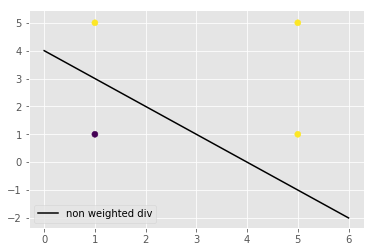

In [2]:
style.use("ggplot")
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]]) # create a np  array for our data
y = [-1,1,1,1] # put label for each data point
clf = svm.SVC(kernel='linear')  # initialize our classifier, we will use SVM with the linear kernel
clf.fit(X, y)  # fit the data : X is data( we have 2 features (R*R), y is the target function


print (clf.support_vectors_)  # print the support vectors.By inspection, obviously we can see that [1, 1][1, 5][5, 1] are sup vec  
print (clf.n_support_)  #count support vectors for each class. we have one sup vec for class "-1" and the rest for "+1"==>(1,2)
print( clf.intercept_[0])  # c
w = clf.coef_[0]  # the orthogonal vector (a,b)
print(w)
a = -w[0] / w[1] # y=ax+b : a=-w[0] / w[1], b= - clf.intercept_[0] / w[1]
b= - clf.intercept_[0] / w[1]
print( "y=",a,"* x+",b)


xx = np.linspace(0,6)
yy = a * xx + b
plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

## 2 Quelques exemples d’applications

On a le choix entre quatre noyaux (option Kernel de SVC) :


<i>Linèaire linear</i>$$k(x,y)= <x,y>$$

<i> polynomial pol </i>$$k(x,y)=(\gamma .<x,y>+ r)^d$$

<i> radial rbf </i> $$ k(x,y)= exp(-\gamma ||x-y||) $$

<i> sigmoîd sigmoid</i> $$ k(x,y)= \tanh (\gamma <x,y>)$$

Les paramètres gamma , d et r s’écrivent gamma, degree et coef0 resp. Le paramètre de coût C (vu en cours)
s’écrit cost.

### 2.1 Iris

Nous allons commencer par les illustres données « iris » de Fischer : la taille en centimètre des pétales et
autres parties que je ne saurais nommer de certaines fleurs. Pour chaque individu on a 4 infos numériques 
et la classe. Les classes sont Iris setosa, Iris versicolor et Iris virginica. On a 150 individus et les classes
sont équidistribuées.

#### step 1: Load data and initialize the classifier  

In [3]:
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target

#### step 2: split data for train/test using train_test_split function

In [4]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

#### step 3: fit your model

In [5]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### step 4: predict for X_test using your model that you have just fitted

In [6]:
y_pred=clf.predict(X_test)


#### step 5: using precision_recall_fscore_support function, under sklearn.metrics package, compute precsion, recall and fscore for each class

In [7]:
precision_recall_fscore_support(y_test, y_pred)

(array([ 1.,  1.,  1.]),
 array([ 1.,  1.,  1.]),
 array([ 1.,  1.,  1.]),
 array([16, 17, 17]))

#### step 6 : using KFold in sklearn.cross_validation package, with K=10, compute the average recall and precision for each class

In [8]:
kf = KFold(150, n_folds=10,shuffle=True)
Precision=0
Recall=0
for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    Precision=np.add(Precision,precision_recall_fscore_support(y_test,y_pred,labels=['0','1','2'])[0])
    Recall=np.add(Recall,precision_recall_fscore_support(y_test,y_pred)[1])
Precision/10,Recall/10


/opt/conda/lib/python3.5/site-packages/numpy/lib/arraysetops.py:375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


(array([ 1.        ,  0.98      ,  0.94571429]),
 array([ 1.        ,  0.93238095,  0.9875    ]))

#### step 7: let's put everything together in one function which takes as paramters the kernel and C value.

In [25]:
def Iris_SVM(kernel_choice,C_value):
    # load data and initialize the classifier with Kernel="kernel" and C="C"
     # kernels that we can use :'linear', 'poly', 'rbf', 'sigmoid'
    clf = svm.SVC(C=C_value,kernel=kernel_choice)
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    '''
    # if you want to test the effect of scaling data before applying SVM:
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(X))
    X_scaled=df_scaled.values
    '''
    
    
    # split data into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)
    
    
    # fit and predict
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    precision_recall_train_test=precision_recall_fscore_support(y_test, y_pred)
    
    print("Precision, Recall and Fscore for train_test split is :\n",precision_recall_train_test)
    
    
    
    
    kf = KFold(150, n_folds=10,shuffle=True)
    Precision=0
    Recall=0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_cv, X_test_cv = X[train_index], X[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]
    
        clf.fit(X_train_cv,y_train_cv)
        y_pred_cv=clf.predict(X_test_cv)
        Precision=np.add(Precision,precision_recall_fscore_support(y_test_cv,y_pred_cv,labels=['0','1','2'])[0])
        Recall=np.add(Recall,precision_recall_fscore_support(y_test_cv,y_pred_cv)[1])
    print("Precision and Recall for cross validation is : \n", Precision/10,Recall/10)
 

#### step 8: Call your function for different values of C with the same kernel

In [30]:
C_values=[1,10]
for C in C_values:
    print("################## Results for C=",C,":#####################\n")
    print(Iris_SVM('rbf',C))

################## Results for C= 1 :#####################

Precision, Recall and Fscore for train_test split is :
 (array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([16, 17, 17]))
Precision and Recall for cross validation is : 
 [ 1.      0.975   0.9375] [ 1.          0.94071429  0.975     ]
None
################## Results for C= 10 :#####################

Precision, Recall and Fscore for train_test split is :
 (array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([16, 17, 17]))
Precision and Recall for cross validation is : 
 [ 1.          0.96333333  0.90333333] [ 1.          0.92619048  0.96333333]
None


/opt/conda/lib/python3.5/site-packages/numpy/lib/arraysetops.py:375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


In [28]:
Iris_SVM('rbf',1)

Precision, Recall and Fscore for train_test split is :
 (array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([16, 17, 17]))
Precision and Recall for cross validation is : 
 [ 1.          0.98571429  0.94166667] [ 1.     0.95   0.975]


/opt/conda/lib/python3.5/site-packages/numpy/lib/arraysetops.py:375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


#### step 9: Try to use different type of kernls with the same value of C( take C=1)

In [23]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print("################## Results for :", kernel,"###########################\n")
    print(Iris_SVM(kernel,1))

################## Results for : linear ###########################

Precision, Recall and Fscore for train_test split is :
 (array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([16, 17, 17]))
Precision and Recall for cross validation is 
 [ 1.          0.98333333  0.95      ] [ 1.          0.94666667  0.98888889]
None
################## Results for : poly ###########################

Precision, Recall and Fscore for train_test split is :
 (array([ 1.        ,  0.80952381,  1.        ]), array([ 1.        ,  1.        ,  0.76470588]), array([ 1.        ,  0.89473684,  0.86666667]), array([16, 17, 17]))
Precision and Recall for cross validation is 
 [ 1.     0.975  0.955] [ 1.          0.9675      0.98333333]
None
################## Results for : rbf ###########################

Precision, Recall and Fscore for train_test split is :
 (array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([ 1.,  1.,  1.]), array([16, 17, 17]))
Precision and Recall for cross vali

/opt/conda/lib/python3.5/site-packages/numpy/lib/arraysetops.py:375: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)
/opt/conda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 2.2 SPAM

Refaire toutes les opérations en utilisant l’ensemble de données « SPAM » du labo Hewlett-Packard
(https://archive.ics.uci.edu/ml/datasets/Spambase). Les classes sont spam et nonspam. Pour chaque
individu on a 57 données numériques et la classe. On a 4 061 individus et les classes sont distribuées de la
manière suivante : 39,4% de spam et 60,59% de nonspam.<br/>
Voir
https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION
pour la description des données.<br/>
Faire varier les noyaux et les paramètres et comparer les résultats en fonction de l’importance de la
précision et du rappel.

In [18]:
spambase=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
y1=spambase.pop(57)
X1=spambase.values

In [19]:
def SpamBase_SVM(kernel_choice,C_value):
    # load data and initialize the classifier with Kernel="kernel" and C="C"
     # kernels that we can use :'linear', 'poly', 'rbf', 'sigmoid'
    clf = svm.SVC(C=C_value,kernel=kernel_choice)
    
    # split data into train/test
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42,stratify=y1)
    
    
    # fit and predict
    clf=clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    
    precision_recall_train_test=precision_recall_fscore_support(y_test, y_pred)
    
    print("Precision, Recall and Fscore for train_test split is :\n",precision_recall_train_test)
    
    
    
    
    kf = KFold(len(X1), n_folds=10,shuffle=True)
    Precision=0
    Recall=0
    for train_index, test_index in kf:
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train_cv, X_test_cv = X1[train_index], X1[test_index]
        y_train_cv, y_test_cv = y1[train_index], y1[test_index]
    
        clf.fit(X_train_cv,y_train_cv)
        y_pred_cv=clf.predict(X_test_cv)
        Precision=np.add(Precision,precision_recall_fscore_support(y_test_cv,y_pred_cv,labels=['0','1'])[0])
        Recall=np.add(Recall,precision_recall_fscore_support(y_test_cv,y_pred_cv)[1])
    print("Precision and Recall for cross validation is \n", Precision/10,Recall/10)

In [20]:
SpamBase_SVM('linear',1)